In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

%matplotlib inline

In [25]:
from google.colab import files
uploaded = files.upload()

Saving Country-data.csv to Country-data (2).csv


In [26]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Country-data.csv']))

In [27]:
print(df.shape)
df.head(10)

(167, 10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
encoder = LabelEncoder()

In [30]:
df['country'] = encoder.fit_transform(df['country'])

In [31]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [32]:
scaler = StandardScaler()

In [33]:
df = scaler.fit_transform(df)

In [42]:
df_new = pd.DataFrame(df)

In [43]:
df_new

,0,1,2,3,4,5,6,7,8,9
0,-1.721710,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-1.700967,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-1.680223,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,-1.659480,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-1.638736,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...,...
162,1.638736,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,1.659480,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,1.680223,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,1.700967,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [36]:
pca = PCA(n_components = 4)

In [44]:
principalComponents = pca.fit_transform(df_new)

In [45]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4'])

In [46]:
principalDf

,PC1,PC2,PC3,PC4
0,-2.958742,-0.069228,-1.069441,-0.530017
1,0.382716,-0.764844,-0.774705,-1.787886
2,-0.330796,-0.608983,0.743649,-1.972958
3,-2.975090,1.548361,1.027755,-1.295993
4,0.988175,-0.040027,-0.688950,-1.729763
...,...,...,...,...
162,-0.775815,0.791185,-0.023690,0.841395
163,-0.503341,-1.000980,3.566364,1.022876
164,0.545452,1.554582,0.154818,0.861576
165,-1.839362,0.088454,1.558038,1.255989


**For PC1 and PC2 columns.**

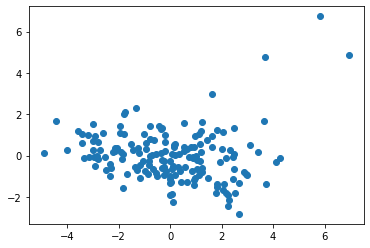

In [77]:
plt.scatter(principalDf['PC1'], principalDf['PC2'])

In [52]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(principalDf[['PC1', 'PC2']])
    sse.append(km.inertia_)

In [53]:
sse

[950.1774913407864,
 504.50557650284395,
 354.9008134278198,
 247.4936798534239,
 192.50830332578278,
 157.33489112209242,
 132.94961908767385,
 114.45395821429548,
 102.00270077400515]

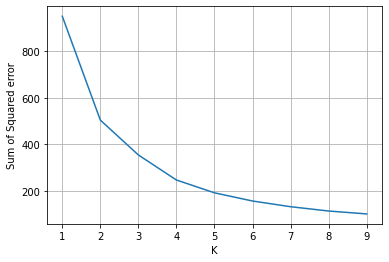

In [55]:
plt.xlabel('K')
plt.ylabel('Sum of Squared error')
plt.plot(k_rng, sse)
plt.grid(True)

In [56]:
km = KMeans(n_clusters = 4)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [57]:
y_pred = km.fit_predict(principalDf[['PC1', 'PC2']])

In [58]:
principalDf['cluster1'] = y_pred
principalDf.head()

,PC1,PC2,PC3,PC4,cluster1
0,-2.958742,-0.069228,-1.069441,-0.530017,2
1,0.382716,-0.764844,-0.774705,-1.787886,1
2,-0.330796,-0.608983,0.743649,-1.972958,1
3,-2.975090,1.548361,1.027755,-1.295993,2
4,0.988175,-0.040027,-0.688950,-1.729763,1


In [59]:
principalDf['cluster1'].unique()

array([2, 1, 0, 3], dtype=int32)

In [61]:
km.cluster_centers_

array([[ 2.41213648, -0.62673609],
       [ 0.12515138, -0.13797828],
       [-2.46144948,  0.38042398],
       [ 5.47565509,  5.44919043]])

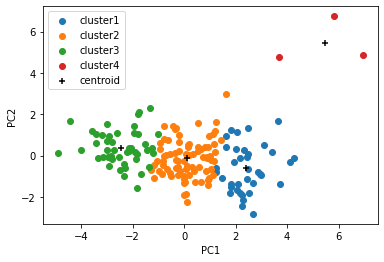

In [64]:
principalDf1 = principalDf[principalDf.cluster1 == 0]
principalDf2 = principalDf[principalDf.cluster1 == 1]
principalDf3 = principalDf[principalDf.cluster1 == 2]
principalDf4 = principalDf[principalDf.cluster1 == 3]

plt.scatter(principalDf1['PC1'], principalDf1['PC2'], label = 'cluster1')
plt.scatter(principalDf2['PC1'], principalDf2['PC2'], label = 'cluster2')
plt.scatter(principalDf3['PC1'], principalDf3['PC2'], label = 'cluster3')
plt.scatter(principalDf4['PC1'], principalDf4['PC2'], label = 'cluster4')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'black', marker ='+', label = 'centroid')

plt.xlabel('PC1')
plt.ylabel('PC2')

plt.legend()

**For PC3 and PC4 columns.**

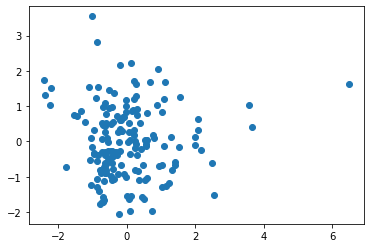

In [68]:
plt.scatter(principalDf['PC3'], principalDf['PC4'])

In [65]:
k_rng = range(1,10)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(principalDf[['PC3', 'PC4']])
  sse.append(km.inertia_)

In [66]:
sse

[370.436029712803,
 255.69386364898972,
 162.63140383047516,
 131.55290209557685,
 108.35364364515618,
 85.22701386072436,
 74.20772478086971,
 63.02350294445589,
 53.93630460011592]

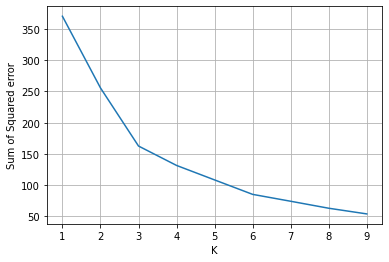

In [67]:
plt.xlabel('K')
plt.ylabel('Sum of Squared error')
plt.plot(k_rng, sse)
plt.grid(True)

In [69]:
km = KMeans(n_clusters = 6)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [72]:
y_pred_2 = km.fit_predict(principalDf[['PC3', 'PC4']])

In [73]:
principalDf['cluster2'] = y_pred_2
principalDf.head()

,PC1,PC2,PC3,PC4,cluster1,cluster2
0,-2.958742,-0.069228,-1.069441,-0.530017,2,0
1,0.382716,-0.764844,-0.774705,-1.787886,1,5
2,-0.330796,-0.608983,0.743649,-1.972958,1,5
3,-2.975090,1.548361,1.027755,-1.295993,2,4
4,0.988175,-0.040027,-0.688950,-1.729763,1,5


In [74]:
principalDf['cluster2'].unique()

array([0, 5, 4, 2, 1, 3], dtype=int32)

In [75]:
km.cluster_centers_

array([[-0.4429228 , -0.13419675],
       [ 0.16353256,  1.09724822],
       [-1.49523565,  1.47264968],
       [ 4.5631388 ,  1.01963292],
       [ 1.35986559, -0.35670428],
       [-0.23939103, -1.24045279]])

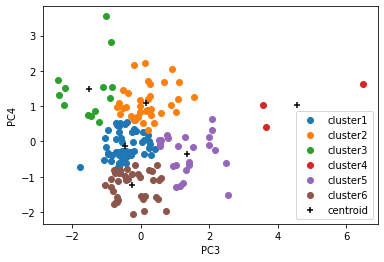

In [76]:
principalDf1 = principalDf[principalDf.cluster2 == 0]
principalDf2 = principalDf[principalDf.cluster2 == 1]
principalDf3 = principalDf[principalDf.cluster2 == 2]
principalDf4 = principalDf[principalDf.cluster2 == 3]
principalDf5 = principalDf[principalDf.cluster2 == 4]
principalDf6 = principalDf[principalDf.cluster2 == 5]

plt.scatter(principalDf1['PC3'], principalDf1['PC4'], label = 'cluster1')
plt.scatter(principalDf2['PC3'], principalDf2['PC4'], label = 'cluster2')
plt.scatter(principalDf3['PC3'], principalDf3['PC4'], label = 'cluster3')
plt.scatter(principalDf4['PC3'], principalDf4['PC4'], label = 'cluster4')
plt.scatter(principalDf5['PC3'], principalDf5['PC4'], label = 'cluster5')
plt.scatter(principalDf6['PC3'], principalDf6['PC4'], label = 'cluster6')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'black', marker ='+', label = 'centroid')

plt.xlabel('PC3')
plt.ylabel('PC4')

plt.legend()